<a href="https://colab.research.google.com/github/som-choudhary/Airbnb/blob/main/Airbnb_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Home-Residential Stays for Business Travelers: A Case Study**

**Scenario**: You work for a European boutique hotel/home-accommodation company that wants to expand to New York City, your first North American operation. Your company wants to establish a network of home residences for business travelers who need to be in New York for extended periods for work.

**Objective**: Your goal is to analyze the available NYC open data of accommodation and present the insight of the NYC home-accommodation market to help your client make business decisions.

**Metrics**: Price, count, Average cashflow from property











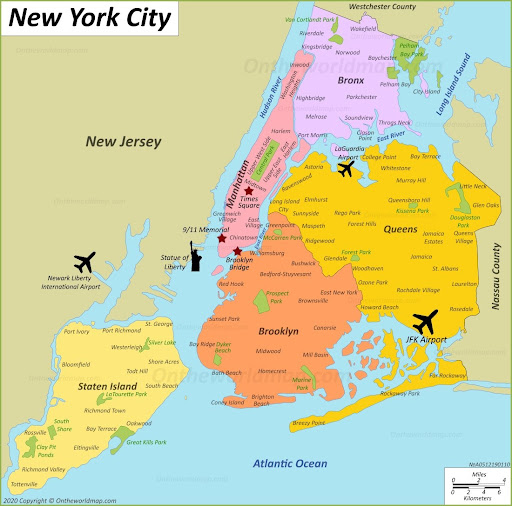

##Project steps:



1.   Data Loading
2.   Data Cleaning
3.   Exploration Data Analysis
4.   Conclusion




# Data Sourcing

Import necessary packages

In [1]:
pip install haversine

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.image as mpimg
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
from haversine import haversine_vector, Unit


In [3]:
#read file using Pandas library
df_nyc = pd.read_csv('https://raw.githubusercontent.com/som-choudhary/Airbnb/main/AB_NYC_2019_rev_2_2021(uncleaned).csv')

df_nyc.head()

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,10/19/18,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,NaN,5/21/19,0.38,2.0,NaN
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,NaN,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,07-05-2019,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,NaN,-73.94399,Entire home/apt,80.0,10.0,9.0,11/19/18,0.10,1.0,0.0


**Check length and description of data frame**

In [4]:
#length of dataframe
len(df_nyc)

48895

In [5]:
#datatype of each column
df_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
borough                            object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

In [6]:
#statistics summary of the dataframe
df_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48857.000000,48865.000000,48849.000000,48853.000000,48865.000000,38825.000000,48874.000000,48848.000000
mean,1.901714e+07,6.762001e+07,40.728944,-73.952177,152.714385,7.030152,23.263174,1.373284,7.137906,112.741402
std,1.098311e+07,7.861097e+07,0.054533,0.046144,240.222835,20.517685,44.537393,1.680621,32.927030,131.622469
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723080,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763100,-73.936280,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
#median value of each column
print('Median Values')
print('\n')
print(df_nyc[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']].median())

Median Values


price                             106.00
minimum_nights                      3.00
number_of_reviews                   5.00
reviews_per_month                   0.72
calculated_host_listings_count      1.00
availability_365                   45.00
dtype: float64


# Data Cleaning

Let's analyze each column and will do the necessary data cleaning if required

##Missing value handling

In [8]:
#missing values in each column
df_nyc.isnull().sum()

id                                    0
name                                 17
host_id                               0
host_name                            71
borough                              74
neighbourhood                        45
latitude                             38
longitude                            30
room_type                           104
price                                46
minimum_nights                       42
number_of_reviews                    30
last_review                       10084
reviews_per_month                 10070
calculated_host_listings_count       21
availability_365                     47
dtype: int64

In [9]:
#percent of missing values
df_nyc.isnull().sum()/len(df_nyc)*100

id                                 0.000000
name                               0.034768
host_id                            0.000000
host_name                          0.145209
borough                            0.151345
neighbourhood                      0.092034
latitude                           0.077718
longitude                          0.061356
room_type                          0.212701
price                              0.094079
minimum_nights                     0.085898
number_of_reviews                  0.061356
last_review                       20.623786
reviews_per_month                 20.595153
calculated_host_listings_count     0.042949
availability_365                   0.096124
dtype: float64

Here we can observe 'last_reviews' and 'reviews_per_month' contain more 20% missing values. Since 'last_reviews' is not significant for our anlysis we can drop that column. Also, to make our data set cleaner we can remove 'id' and 'host name' for our analysis.


In [10]:
df_nyc.drop(['id','host_name','last_review'], axis =1, inplace = True )

In [11]:
df_nyc.columns

Index(['name', 'host_id', 'borough', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

The missing values of 'review_per_month' can be easily handled by replacing NaN with 0, instead of delating 20% of data. Since many rows in 'number_of_reviews' have zero reviews, it makes sense to replace with 0 as well. 


In [12]:
#replacing Null value 'review_per_month' with 0
df_nyc.fillna({'reviews_per_month':0}, inplace=True)

Since other columns had far fewer missing values, we can simply remove those rows for our analysis.

In [13]:
#dropping rows having missing values
df_nyc.dropna(inplace = True)
df_nyc.isnull().sum()

name                              0
host_id                           0
borough                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

##Standardizing categorical columns

You can observe there are three cataegorical variable present

*   borough
*   neighbourhood
*   room_type





In [14]:
#check unique values of borough
pd.unique(df_nyc['borough'])

array(['Brooklyn', 'Manhattan', 'Queens', 'Brookly', 'Staten Island',
       'Bronx', 'Queen', 'Manhattn', 'Manhatteen', 'Mahattan'],
      dtype=object)

In [15]:
#correct misspellings of borough
df_nyc = df_nyc.replace('Brookly', 'Brooklyn').replace(['Manhattn', 'Manhatteen', 'Mahattan'], 
                                                   'Manhattan').replace('Queen', 'Queens')

In [16]:
#confirm changes
pd.unique(df_nyc['borough'])

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [17]:
#check neighbourhood
pd.unique(df_nyc['neighbourhood'])

array(['Kensington', 'Clinton Hill', 'Murray Hill', "Hell's Kitchen",
       'Upper West Side', 'South Slope', 'West Village', 'Chelsea',
       'Crown Heights', 'Park Slope', 'Windsor Terrace', 'Inwood',
       'East Village', 'Harlem', 'Bedford-Stuyvesant', 'Bushwick',
       'Flatbush', 'Fort Greene', 'Greenpoint', 'Kips Bay',
       'Williamsburg', 'SoHo', 'Upper East Side', 'Washington Heights',
       'Woodside', 'Brooklyn Heights', 'Prospect Heights',
       'Carroll Gardens', 'Lower East Side', 'Flatlands', 'Cobble Hill',
       'Flushing', 'East Harlem', 'Boerum Hill', 'Sunnyside', 'DUMBO',
       'Gowanus', 'St. George', 'Highbridge', 'Financial District',
       'Ridgewood', 'Jamaica', 'Middle Village', 'NoHo',
       'Roosevelt Island', 'Chinatown', 'Midtown', 'Little Italy',
       'East Flatbush', 'Tompkinsville', 'Astoria', 'Clason Point',
       'Eastchester', 'Kingsbridge', 'Two Bridges', 'Queens Village',
       'Rockaway Beach', 'Forest Hills', 'Nolita', 'Greenwich V

In [18]:
#number of neighbourhoods
len(pd.unique(df_nyc['neighbourhood']))

221

In [19]:
#check unique values of room type
pd.unique(df_nyc['room_type'])

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

3 types of rooms are available 

*   Private room
*   Entire home/apt
*   Shared room










Since our client is Europian, for presentation purpose we need to add a column which has price in euros. 
Use the conversion rate as 1 USD = 0.88 Euro.


In [20]:
df_nyc['price_euro'] = df_nyc['price']*.88

In [21]:
df_nyc.head()

,name,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_euro
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0,131.12
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0,78.32
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,0.59,1.0,129.0,176.00
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,3.47,1.0,220.0,69.52
10,Beautiful 1br on Upper West Side,7702,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,0.43,1.0,6.0,118.80


##Outlier Detection

Since price is the key metric that we are interested in. and different neighbourhood has different affordibility. Therfore we will remove outlier based on price for each neighbourhood

In [31]:
df_nyc['price'].describe()

count    48519.000000
mean       152.727859
std        240.480854
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [23]:
#define function which contains outlier
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_drop=df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_drop

In [24]:
neighbourhood = df_out['neighbourhood'].unique()

In [25]:
outlier_index = []

In [26]:
for i in range(len(neighbourhood)):
  df_outlier=remove_outlier_IQR(df_out[df_out['neighbourhood']== neighbourhood[i]].price)
  outlier_index.extend(df_outlier.index)


In [27]:
len(outlier_index)

3090

In [28]:
df_nyc_clean = df_nyc.drop(outlier_index)

In [29]:
len(df_nyc_clean)

45429

In [32]:
df_nyc_clean['price'].describe()

count    45429.000000
mean       123.159392
std         78.514122
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max       1485.000000
Name: price, dtype: float64

In [86]:
df_nyc['price'].describe()

count    48519.000000
mean       152.727859
std        240.480854
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

###lat long outlier (pending)

No handles with labels found to put in legend.


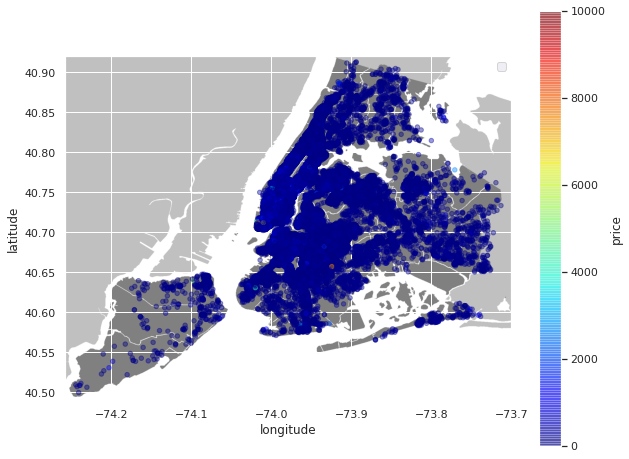

In [88]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df_nyc.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

# Exploratory Data Analysis

Exploring catagorical variable

##Host analysis

In [33]:
#Pick top 20 host
top_host = df_nyc_clean.host_id.value_counts().head(20)
top_host

219517861    282
107434423    221
30283594     114
137358866    103
12243051      96
16098958      92
61391963      91
22541573      87
200380610     60
1475015       52
7503643       52
120762452     50
2856748       49
190921808     44
26377263      43
2119276       38
19303369      37
25237492      34
76104209      33
119669058     33
Name: host_id, dtype: int64

In [34]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [35]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,282
1,107434423,221
2,30283594,114
3,137358866,103
4,12243051,96
5,16098958,92
6,61391963,91
7,22541573,87
8,200380610,60
9,1475015,52


[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643'),
 Text(0, 0, '1475015'),
 Text(0, 0, '120762452'),
 Text(0, 0, '2856748'),
 Text(0, 0, '190921808'),
 Text(0, 0, '26377263'),
 Text(0, 0, '2119276'),
 Text(0, 0, '19303369'),
 Text(0, 0, '25237492'),
 Text(0, 0, '76104209'),
 Text(0, 0, '119669058')]

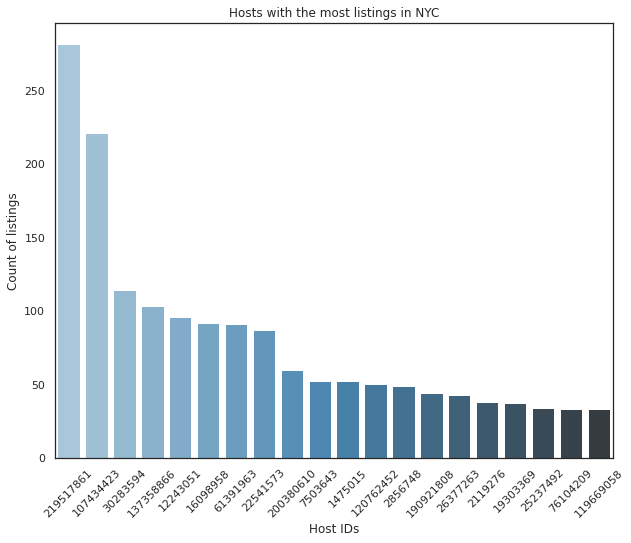

In [36]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d',order=top_host_df.sort_values('P_Count',ascending = False).Host_ID)
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

###Host vs Price

In [37]:
host_price = pd.pivot_table(df_nyc_clean, values = 'price', index = 'host_id', 
                                        aggfunc = 'mean')


In [38]:
host_price['host_id']= host_price.index

In [39]:
host_price.sort_values('price', ascending = False )

,price,host_id
host_id,,
10416706,1485.0,10416706
181889371,1315.0,181889371
23001368,850.0,23001368
29941633,850.0,29941633
46564548,800.0,46564548
...,...,...
62685070,10.0,62685070
84497333,10.0,84497333
91034542,10.0,91034542


##Borough Analysis

Borough count

In [40]:
df_nyc['borough'].value_counts()

Manhattan        21506
Brooklyn         19920
Queens            5637
Bronx             1084
Staten Island      372
Name: borough, dtype: int64

In [41]:
df_nyc['borough'].value_counts(normalize = True)*100

Manhattan        44.324904
Brooklyn         41.056081
Queens           11.618129
Bronx             2.234176
Staten Island     0.766710
Name: borough, dtype: float64

###Borough vs Price

Text(0, 0.5, 'Price')

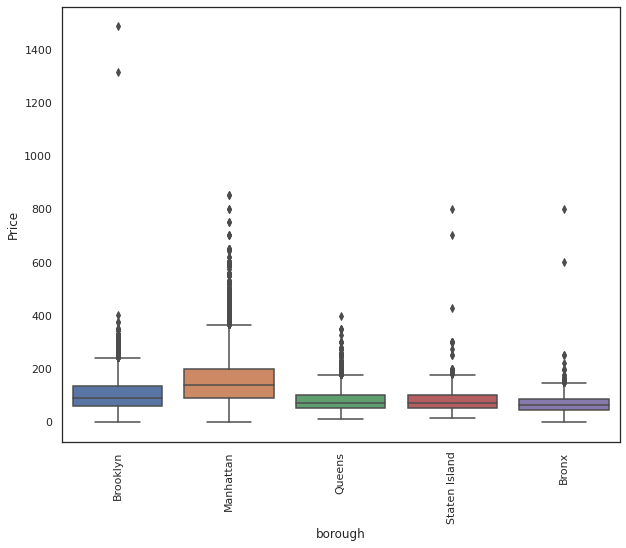

In [42]:
df_borough_price = df_nyc_clean[['price','borough']]
sns.boxplot(y='price', x='borough',data=df_borough_price)
plt.xticks(rotation=90)
plt.ylabel('Price')

Borough and price comparision

In [43]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=df_nyc_clean.loc[df_nyc_clean['borough'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df_nyc_clean.loc[df_nyc_clean['borough'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df_nyc_clean.loc[df_nyc_clean['borough'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df_nyc_clean.loc[df_nyc_clean['borough'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df_nyc_clean.loc[df_nyc_clean['borough'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [44]:
#empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#change names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilize dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,90.0,50.0,50.0,45.0
50%,89.0,140.0,70.0,72.0,62.5
75%,133.0,200.0,100.0,100.0,85.0
max,1485.0,850.0,398.0,800.0,800.0


##Neighbour Analysis

Top 20 neighbourhoods for rentals


In [45]:
df_nyc_clean.neighbourhood.value_counts().head(20)

Williamsburg          3695
Bedford-Stuyvesant    3513
Harlem                2465
Bushwick              2275
Hell's Kitchen        1839
Upper West Side       1826
East Village          1726
Upper East Side       1658
Crown Heights         1445
Midtown               1406
Greenpoint            1054
East Harlem           1046
Chelsea               1032
Lower East Side        864
Astoria                844
Washington Heights     836
West Village           700
Financial District     679
Flatbush               579
Clinton Hill           527
Name: neighbourhood, dtype: int64

Number of neghbourhoods in each borough

In [46]:
df_nyc_clean.groupby(['borough'])['neighbourhood'].nunique().sort_values(ascending= False)

borough
Queens           51
Bronx            48
Brooklyn         47
Staten Island    43
Manhattan        32
Name: neighbourhood, dtype: int64

In [47]:
borugh_neighbour_count = df_nyc_clean.groupby(['borough'])['neighbourhood'].nunique().sort_values(ascending= False)
borugh_neighbour_count/borugh_neighbour_count.sum()*100

borough
Queens           23.076923
Bronx            21.719457
Brooklyn         21.266968
Staten Island    19.457014
Manhattan        14.479638
Name: neighbourhood, dtype: float64

###Neighbourhood vs Price

In [48]:
neighbourhood_price = pd.pivot_table(df_nyc_clean, values = 'price', index = 'neighbourhood', 
                                        aggfunc = 'mean')
neighbourhood_price.sort_values('price', ascending = False )

,price
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Sea Gate,487.857143
Tribeca,305.802548
Neponsit,274.666667
...,...
Hunts Point,44.647059
New Dorp Beach,44.500000
Bull's Head,40.800000


##Room Type analysis

How many residences are there by room type?

In [49]:
df_nyc_clean.groupby(['room_type'])['name'].count()

room_type
Entire home/apt    22467
Private room       21831
Shared room         1131
Name: name, dtype: int64

In [50]:
df_nyc_clean.room_type.value_counts(normalize = True)*100

Entire home/apt    49.455194
Private room       48.055207
Shared room         2.489599
Name: room_type, dtype: float64

###roomtype vs price (pending)

Create two pivot tables to show
 1. the number of each room type by borough 
 2. the median price for each room type by borough.

In [51]:
pd.pivot_table(df_nyc_clean, values = 'price', index = 'borough', 
                                        columns = 'room_type',aggfunc = len)
#add percentage table

room_type,Entire home/apt,Private room,Shared room
borough,,,
Bronx,311,628,59
Brooklyn,8444,9923,407
Manhattan,11808,7792,467
Queens,1750,3304,189
Staten Island,154,184,9


Brooklyn and Manhattan have approximately the same number of private rooms, but there is a significant difference in entire home/apt housing type. We need to investigate how to increase entire home/apts in Brooklyn.

**Count of each room type in each borough** 

##Neighbourhood and room type anlysis with borough

In [52]:
#top 10 neighbourhoods
list(df_nyc_clean.neighbourhood.value_counts().head(10).index)

['Williamsburg',
 'Bedford-Stuyvesant',
 'Harlem',
 'Bushwick',
 "Hell's Kitchen",
 'Upper West Side',
 'East Village',
 'Upper East Side',
 'Crown Heights',
 'Midtown']

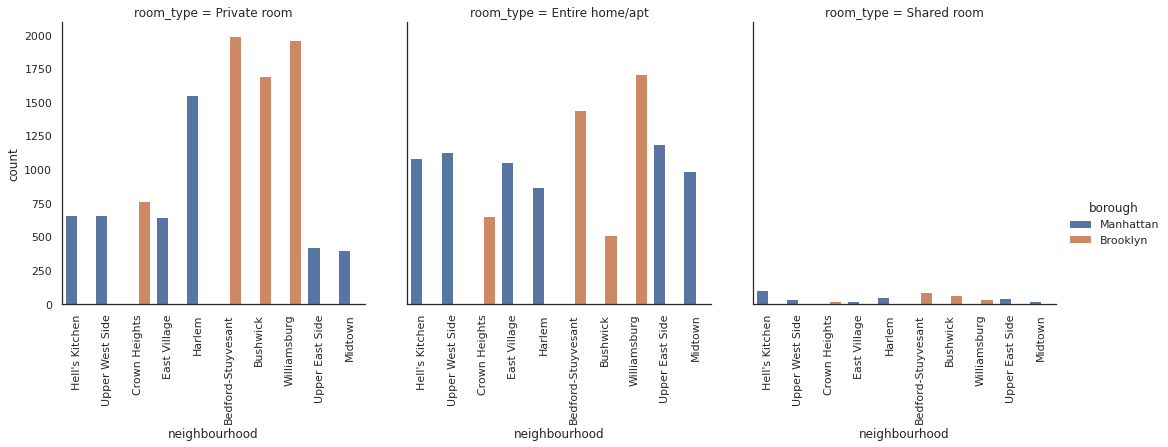

In [53]:
Top_10_neighbourhood = list(df_nyc_clean.neighbourhood.value_counts().head(10).index)
sub_7=df_nyc_clean.loc[df_nyc_clean['neighbourhood'].isin(Top_10_neighbourhood)]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='borough', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

In the above graph, we can observe that 
* 'Shared room' type of rarely 
available in top 10 listing-populated neighbourhood. 
* Only two borough 'Manhattan' and 'Brooklyn' are shown in the hue, which was expected since these two borough are most travelled places therefore all top 10 neighbourhood present in these two borough. 
* We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

Eliminate the room types other than Entire home/apt. How much did this reduce the number of available units?

In [54]:
df_nyc_entire = df_nyc_clean[df_nyc_clean['room_type'] == 'Entire home/apt']

print('Total available units: ',len(df_nyc_clean))
print('\n') 
print('Available entire home/apt units: ',len(df_nyc_entire))

Total available units:  45429


Available entire home/apt units:  22467


##Latitude and logitude Analysis


No handles with labels found to put in legend.


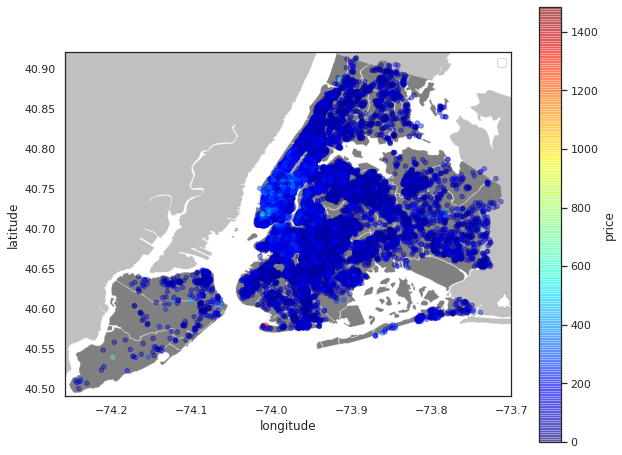

In [55]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df_nyc_clean.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

No handles with labels found to put in legend.


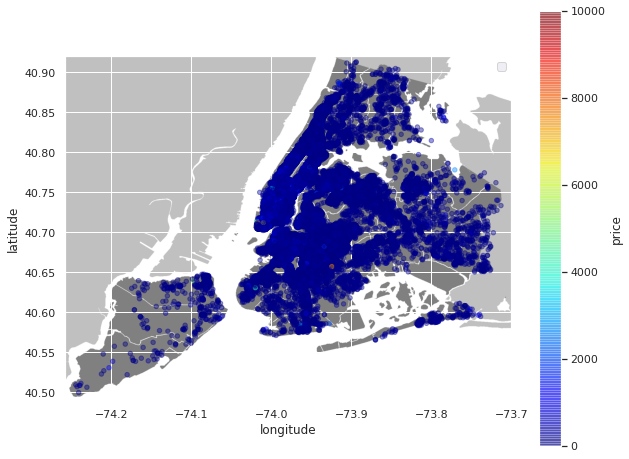

In [87]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df_nyc.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

###Airport distance analysis


NYC has 3 major commercial airport
1. John F. Kennedy International Airport (JFK) (40.6413, -73.780968)
2. Newark Liberty International Airport (EWR) (40.735657, -74.172363)
3. LaGuardia Airport (LGA) (40.7747222222, -73.8719444444)


In [56]:
#Calculate distance of properties from these 3 airports
airport_locations = [[40.6413, -73.780968], [40.735657, -74.172363], [40.7747222222, -73.8719444444]]

#location of listings
listings_location = df_nyc_clean[['latitude','longitude']]

#Distance vector column= airports rows = listings and value = distance in KM 
airport_distance_vector = haversine_vector(airport_locations , listings_location , Unit.KILOMETERS, comb=True)

#adding airport distance vector in to df_nyc_clean
df_nyc_clean[['JFK','EWR','LGA']] = airport_distance_vector 

df_nyc_clean[['name','price','JFK','EWR','LGA']].head()

,name,price,JFK,EWR,LGA
0,Clean & quiet apt home by the park,149.0,16.163463,19.504615,16.486446
3,Cozy Entire Floor of Brownstone,89.0,15.848939,18.779581,12.408768
5,Large Cozy 1 BR Apartment In Midtown East,200.0,20.186493,16.681016,9.186150
7,Large Furnished Room Near B'way,79.0,22.010685,16.119956,9.577391
10,Beautiful 1br on Upper West Side,135.0,23.783006,18.972653,8.483422


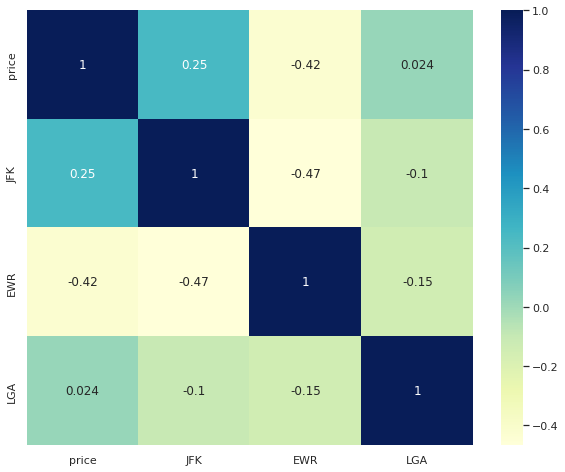

In [57]:
dataplot = sns.heatmap(df_nyc_clean[['name','price','JFK','EWR','LGA']].corr(), cmap="YlGnBu", annot=True)

EWR and price has -0.32 correlation which can support that prices of property near EWR airport are tend to be expensive .`

It is given that commercial neighburhood of NYC are 

1. Downtown Brooklyn
2. Navy Yard 
3. DUMBO 
4. Financial District
5. Civic Center
6. Midtown


Create a column indicating the commercial vs. non-commercial neighourhoods


In [58]:
df_nyc_clean['commercial'] = df_nyc_clean['neighbourhood'].isin(['Downtown Brooklyn','Navy Yard', 'DUMBO', 'Financial District', 'Civic Center', 'Midtown'])*1

In [59]:
#count of property near commercial vs non-commercial place
df_nyc_clean['commercial'].value_counts()

0    43171
1     2258
Name: commercial, dtype: int64

In [60]:
df_nyc_clean['commercial'].value_counts(normalize = True)*100

0    95.029607
1     4.970393
Name: commercial, dtype: float64

In [61]:
print('Total no. of residence in clean dataset of NYC: ', len(df_nyc_clean))
print('\n')
print('No. of residence in commercial neighbourhood: ', df_nyc_clean['commercial'].value_counts()[1] )
print('No. of residence in Non-commercial neighbourhood: ', df_nyc_clean['commercial'].value_counts()[0] )
print('\n')
print('Percentage of residence in commercial neighbourhood:', (df_nyc_clean['commercial'].value_counts(normalize = True)*100)[1] )
print('Percentage of residence in Non-commercial neighbourhood:', (df_nyc_clean['commercial'].value_counts(normalize = True)*100)[0] )


Total no. of residence in clean dataset of NYC:  45429


No. of residence in commercial neighbourhood:  2258
No. of residence in Non-commercial neighbourhood:  43171


Percentage of residence in commercial neighbourhood: 4.970393361068921
Percentage of residence in Non-commercial neighbourhood: 95.02960663893107


Most of properties are availble in Non commercial places

**Are prices inside the non commercial neighborhoods in Manhattan and Brooklyn significantly cheaper than other neighborhoods in their respective boroughs?**

In [62]:
#commercial neighborhoods
df_nyc_clean[df_nyc_clean['commercial']==1].groupby(['borough']).agg({'price_euro':['mean','median','min', 'max']})

price_euro                      
                 mean  median    min    max
borough                                    
Brooklyn   139.152640  132.00  34.32  352.0
Manhattan  189.065917  175.12  10.56  545.6

Bronx, Queens and Staten island do not have commercial neighbour therfore we didn't get those in above table

In [63]:
#non-commerical neighborhoods
df_nyc_clean[df_nyc_clean['commercial']==0].groupby(['borough']).agg({'price_euro':['mean','median','min', 'max']})

price_euro                        
                     mean  median    min      max
borough                                          
Bronx           62.268377   55.00   0.00   704.00
Brooklyn        89.890757   77.44   0.00  1306.80
Manhattan      131.795579  114.40   0.00   748.00
Queens          71.312897   61.60   8.80   350.24
Staten Island   77.531297   63.36  11.44   704.00

From the above table we can observe that mean and median of commercial vs Non-commercial places of Manhattan and Brooklyn have significantly diffrence.
Non commercial place are significantly cheaper.

##Review analysis

##Will preset this different way (pending)

In [64]:

top_reviewed_listings=df_nyc_clean.nlargest(500, 'number_of_reviews')
top_reviewed_listings[['name','number_of_reviews','price']]

,name,number_of_reviews,price
11759,Room near JFK Queen Bed,629.0,47.0
2031,Great Bedroom in Manhattan,607.0,49.0
2030,Beautiful Bedroom in Manhattan,597.0,49.0
2015,Private Bedroom in Manhattan,594.0,49.0
13495,Room Near JFK Twin Beds,576.0,47.0
...,...,...,...
3769,Large Bedroom 15 Min From Manhattan,211.0,45.0
6127,Warm and Cozy Room in Harlem,211.0,71.0
7055,Cozy New York Studio,211.0,125.0
9487,LaGuardia Room with Private Entrance(1),211.0,50.0


In [65]:
review_price_500 = top_reviewed_listings[['number_of_reviews','price']]
review_price_500.corr()

,number_of_reviews,price
number_of_reviews,1.000000,-0.120334
price,-0.120334,1.000000


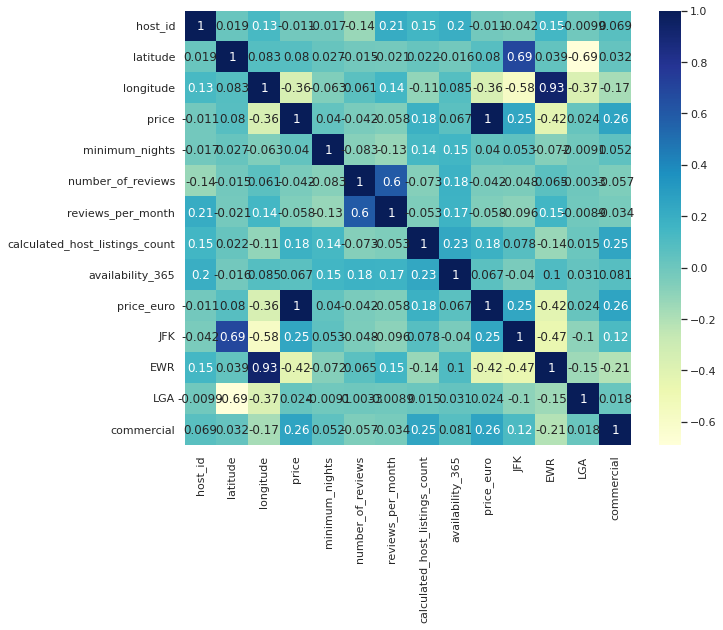

In [66]:
# plotting correlation heatmap
dataplot = sns.heatmap(df_nyc_clean.corr(), cmap="YlGnBu", annot=True)



##Availability analysis

In [67]:
#value count of availability 365
df_nyc_clean['availability_365'].value_counts()

0.0      16759
365.0     1080
364.0      418
1.0        393
5.0        321
         ...  
195.0       24
181.0       23
196.0       22
183.0       22
202.0       18
Name: availability_365, Length: 366, dtype: int64

In [68]:
df_nyc_clean['availability_365'].value_counts(normalize = True)*100

0.0      36.890532
365.0     2.377336
364.0     0.920117
1.0       0.865086
5.0       0.706597
           ...    
195.0     0.052830
181.0     0.050628
196.0     0.048427
183.0     0.048427
202.0     0.039622
Name: availability_365, Length: 366, dtype: float64

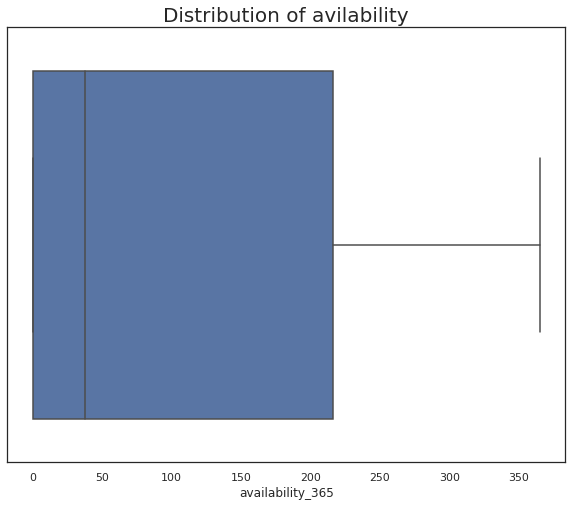

In [69]:
sns.boxplot(x=df_nyc_clean['availability_365']).set_title('Distribution of avilability', fontsize = 20)
sns.set(rc = {'figure.figsize':(15,8)})

##Availability borough wise

##Just for Experiment

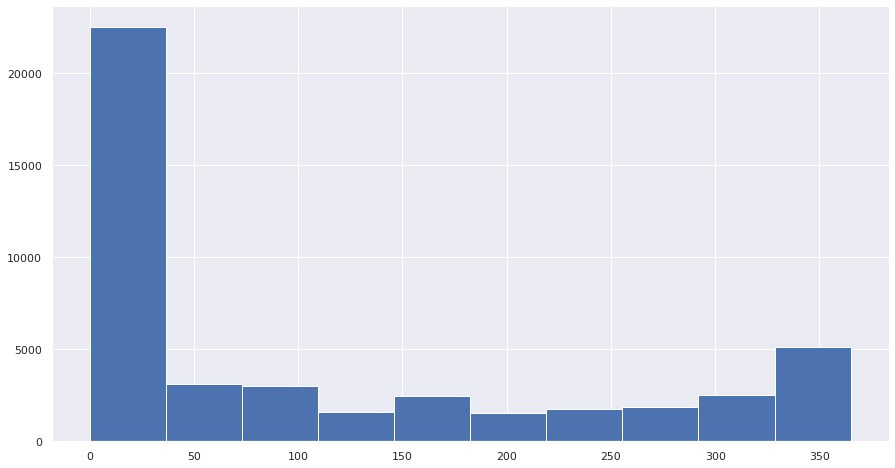

In [70]:
df_nyc_clean.availability_365.hist()

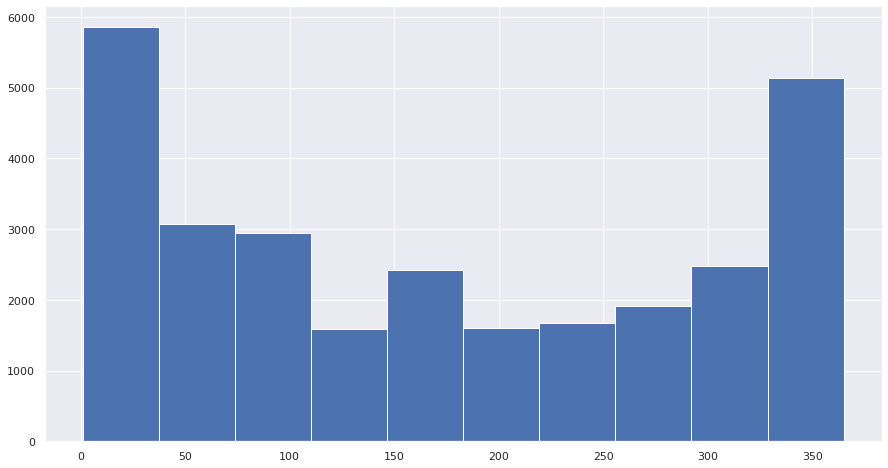

In [71]:
df_nyc_clean[df_nyc_clean['availability_365']>0].availability_365.hist()


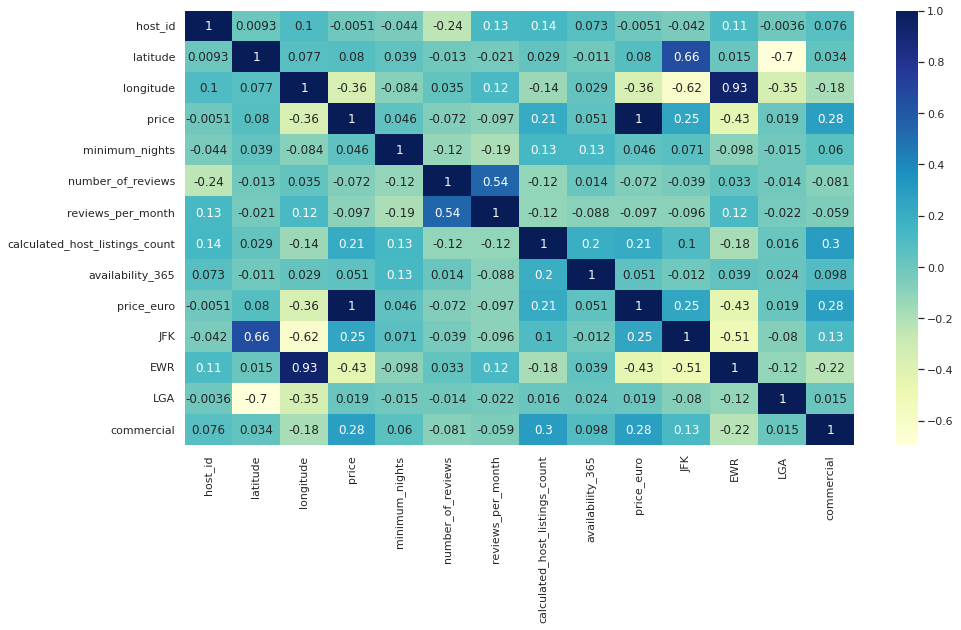

In [72]:
dataplot = sns.heatmap(df_nyc_clean[df_nyc_clean['availability_365']>0].corr(), cmap="YlGnBu", annot=True)

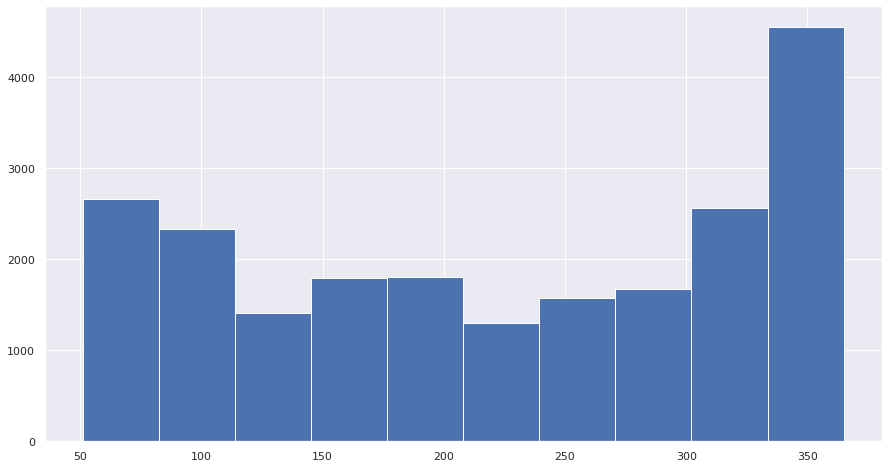

In [73]:
df_nyc_clean[df_nyc_clean['availability_365']>50]['availability_365'].hist()

#Minimum nights

In [90]:
df_nyc_clean['minimum_nights'].value_counts(normalize = True)*100

1.0      26.243149
2.0      23.872416
3.0      16.080037
30.0      7.849611
4.0       6.656541
           ...    
186.0     0.002201
366.0     0.002201
68.0      0.002201
99.0      0.002201
36.0      0.002201
Name: minimum_nights, Length: 106, dtype: float64

In [75]:
df_nyc['minimum_nights'].value_counts()

1.0      12633
2.0      11611
3.0       7938
30.0      3731
4.0       3278
         ...  
366.0        1
68.0         1
87.0         1
183.0        1
36.0         1
Name: minimum_nights, Length: 108, dtype: int64

#Average rent  per property from each borough (need validation) (pending)

In [76]:
total_price_borough =df_nyc_clean[['borough','price']].groupby('borough').agg('sum')

In [77]:
total_price_borough.sort_values('price', ascending = False, inplace =True)

In [78]:
total_price_borough

,price
borough,
Manhattan,3144204.0
Brooklyn,1924735.0
Queens,424879.0
Bronx,70618.0
Staten Island,30572.0


In [79]:
no_of_property_borough = df_nyc_clean.borough.value_counts()

In [80]:
no_of_property_borough

Manhattan        20067
Brooklyn         18774
Queens            5243
Bronx              998
Staten Island      347
Name: borough, dtype: int64

In [81]:
df_cashflow = pd.DataFrame(no_of_property_borough)

In [82]:
df_cashflow['price'] = total_price_borough

In [83]:
df_cashflow['cashflow'] = df_cashflow['price']/df_cashflow['borough']

In [84]:
df_cashflow

,borough,price,cashflow
Manhattan,20067,3144204.0,156.685304
Brooklyn,18774,1924735.0,102.521306
Queens,5243,424879.0,81.037383
Bronx,998,70618.0,70.759519
Staten Island,347,30572.0,88.103746


In [85]:
df_cashflow['cashflow']/df_cashflow['cashflow'].sum()*100

Manhattan        31.393113
Brooklyn         20.540937
Queens           16.236467
Bronx            14.177217
Staten Island    17.652267
Name: cashflow, dtype: float64

# Insights(pending) include that with EDA part

* The properties of the entire home and private rooms are preferred by 
Airbnb hosts offering rental in NYC.
* The room types 'Entire home/ apt' and 'Private room' account for a major portion of listed properties in NYC (around 97%)
* Shared rooms account for 2.4% of the total listed properties
* The rental properties in Manhattan and Brooklyn are more expensive than any other areas. while the Bronx is the least expensive.
* Manhattan has 51% and Brooklyn has 31% contribution in Entire home/apt type residence and rests others contribution involved.
* Manhattan and Brooklyn have similar contributions (~40%) in Private room types.
* Distance from Newark Liberty International Airport (EWR) and Price has a negative correlation(-0.34), which shows properties near EWR are more expensive. We did not find any significant correlation between the other 2 airports.
* The number of reviews and price are negatively correlated(-0.14). properties with lower prices have more reviews.
* The average cash flow per day per property from each borough are similar except Manhattan which contributes 27%
